## Завдання

1. Обрати реальні дані з kaggle або сгенерувати випадкові дані, що містять розподіл деякої ознаки в двох групах.
2. Побудувати графік, що відображає розподіл ознак в групах.
3. Написати функції, що оцінює зв'язок між ознакою та групою за критерієм Пірсона. Функція має оцінювати розбіжність на двох рівнях - 0,001 та 0,05, в залежністі від параметру significant_level, що передається в неї.
Врахувати у функції випадок, що сума частот ознаки у групах може бути відмінною.
4. Перевірити розбіжність на між групами на даних з п. 1. В результаті сформувати таблицю спряженості наступного вигляду:

Ознака  | Група 1 | Група 2  | 
------------- | ------------- |--------- |
Градація ознаки 1  | $n_{11}  $   | $n_{21}$   |
Градація ознаки 2  | $n_{12}$   | $n_{22}$   |
Градація ознаки 3  | $n_{13}$   | $n_{23}$   |

Додати до таблиці стовбчики з відсотовим розподілом по градаціям всередині груп.
Окремо вивести результати роботи критерію (чи є статистична розбіжність між групами).

1.Обрати реальні дані з kaggle або сгенерувати випадкові дані, що містять розподіл деякої ознаки в двох групах.

In [37]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
import os

print("The directory we are working in is: {}".format(os.getcwd()))

The directory we are working in is: /Users/dariamusienko/Desktop/бмд/лаб5


In [80]:
data = pd.read_csv('stu.csv')
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [81]:
new_data = ["F","M"]
f14=0; f16=0; f18=0;f21=0; m14=0; m16=0; m18=0; m21=0
n = data.shape[0]

for i in range(n):
        if "F" in data["sex"][i]:
            if (data['age'][i] <= 14):
                f14 += 1
            elif ((data['age'][i] > 14) & (data['age'][i] <= 16)):
                f16 += 1
            elif ((data['age'][i] > 16) & (data['age'][i] <= 18)):
                f18 += 1
            elif ((data['age'][i] > 18) & (data['age'][i] <= 21)):
                f21 += 1
            
        elif ("M" in data["sex"][i]):
            if (data['age'][i] <= 14):
                m14 += 1
            elif ((data['age'][i] > 14) & (data['age'][i] <= 16)):
                m16 += 1
            elif ((data['age'][i] > 16) & (data['age'][i] <= 18)):
                m18 += 1
            elif ((data['age'][i] > 18) & (data['age'][i] <= 21)):
                m21 += 1

table = pd.DataFrame(columns = new_data)
table = pd.DataFrame({"F": pd.Series([f14, f16, f18, f21], index = ["Less than 14", "Between 14 and 16","Beetween 16 and 18", "Beetween 18 and 21"]),
                     "M": pd.Series([m14, m16, m18, m21], index = ["Less than 14", "Between 14 and 16","Beetween 16 and 18", "Beetween 18 and 21"])})
ntable = copy.deepcopy(table)
table


,F,M
Less than 14,0,0
Between 14 and 16,92,94
Beetween 16 and 18,101,79
Beetween 18 and 21,15,13


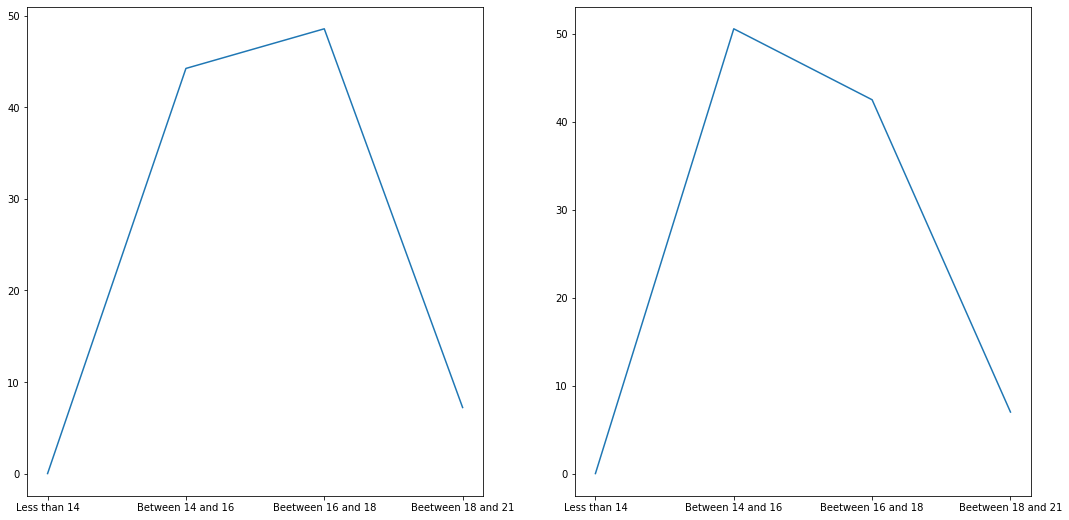

In [62]:
fig = plt.subplots(1,2,figsize = (18,9))

plt.subplot(1, 2, 1)
plt.plot(table.index, table['F'])

plt.subplot(1, 2, 2)
plt.plot(table.index, table['M'])

In [69]:
def pirson(significant_level, real, expected):
    if not abs(sum(real) - sum(expected)) < 0.000001:
        expected = expected / sum(expected) * sum(real)
        
    pirson_values = pd.read_excel('tablePirson.xlsx')
    pirson_values = pirson_values.loc[1:, :]
    pirson_values = pirson_values.rename(columns={"Unnamed: 0": "Level", "Рівень значимості": 0.01, "Unnamed: 2": 0.05})
    pirson_values.set_index("Level", inplace=True)
    
    chi_squared = sum([ (x_real - x_expected)**2 / x_expected for
                  x_real, x_expected in zip(real, expected)])
    
    r = len(real) - 1
    
    
    check_value = tablePirson.loc[r, significant_level]
    return check_value < chi_squared

pirson_values = pd.read_excel('tablePirson.xlsx')


In [88]:
table.insert(1, 'Percentage of F',
                     (np.array([x for x in table['F']]) / table['F'].sum() * 100).round(4))
table.insert(3, 'Percentage of M',
                     (np.array([round(x, 4) for x in table['M']]) / table['F'].sum() * 100).round(4))



In [90]:
table[['Percentage of F', 'Percentage of M']] = table[['Percentage of F', 'Percentage of M']].astype(str) + '%'
table

,F,Percentage of F,M,Percentage of M
Less than 14,0,0.0%,0,0.0%
Between 14 and 16,92,44.2308%,94,45.1923%
Beetween 16 and 18,101,48.5577%,79,37.9808%
Beetween 18 and 21,15,7.2115%,13,6.25%


In [ ]:
sign_01 = pirson (0.01, table['F'], table['M'] )
sign_05 = pirson (0.05, table['F'], table['M'] )

results = pd.DataFrame ( 
    [sign_01, sign_05],
    columns = ["Статистична розбіжність"],
    index = ['0.01', '0.05']
)

results.index.name = 'Рівень значимості'

results